In [1]:
import sys
sys.path.insert(0, '/home/sgiorgi/release/python2/')

In [30]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import matplotlib.patches as mpatches

In [3]:
import dlatk
from dlatk.mysqlMethods import mysql_iter_funcs as mif
from dlatk.featureStar import FeatureStar

/data/anaconda2/envs/wwbpy/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [ ]:
ini_file = "/home/sgiorgi/initFiles/empathyCircum.ini"
init_str = """[constants]
corpdb = emp_test
corptable = msgs_uniq_en
correl_field = user_id
feattable = feat$cat_met_a30_2000_cp_w$msgs_uniq_en$user_id$16to16
outcometable = emp_merged_uniq
outcomefields = path_jord_ispt
outcomecontrols = sal_ec_iopt
group_freq_thresh = 500
"""
with open(ini_file, "w") as text_file:
    text_file.write(init_str)

In [ ]:
fs = FeatureStar.fromFile(ini_file)

In [ ]:
path_correls = fs.oa.correlateWithFeatures(fs.fg[0], False, "BH", [], None, None, False, False, False)

In [ ]:
path_correls = path_correls['path_jord_ispt']

In [ ]:
#path_topics = []
#for topic_id, correl in path_correls.items():
    

In [4]:
db = 'fb22'
index = "user_id"
db_eng = mif.get_db_engine(db)

In [5]:
feat_db = "fb22"
feat_tbl = "feat$cat_met_a30_2000_cp_w$messagesEn$user_id$16to16$1kusers"
feat_sql = "select group_id as user_id, feat, group_norm from {feat_db}.{feat_tbl}".format(feat_db=feat_db, feat_tbl=feat_tbl)
feat = pd.read_sql(sql=feat_sql, con=db_eng)

In [6]:
feat = feat.reset_index()

In [7]:
feat = feat.pivot('user_id', 'feat', 'group_norm')
feat.fillna(0, inplace=True)

In [ ]:
feat.head()

In [8]:
ocean_db = "fb22"
ocean_tbl = "users_ai"
person_sql = "SELECT user_id, ope, con, ext, agr, neu FROM {ocean_db}.{ocean_tbl}".format(ocean_db=ocean_db, ocean_tbl=ocean_tbl)
ocean = pd.read_sql(sql=person_sql, con=db_eng, index_col=index)

In [9]:
ocean = ocean.dropna()
#ocean = ocean.reset_index()
#ocean = ocean.pivot('user_id', 'feat', 'group_norm')

In [10]:
# path pos: 168, 104, 335, 486, 282, 46, 206, 143, 233, 402
# sal pos: 236, 184, 473, 402, 177, 46, 357, 223, 56, 110
# cor_topics = feat[["168", "104", "335", "486", "282", "46", "206", "143", "233", "402", "236", "184", "473", "402", "177", "46", "357", "223", "56", "110"]]

# path pos: 157, 622, 327, 1456, 1452, 381, 113, 1733, 1517, 1910, 466, 850, 1642, 1347, 1262, 873, 495, 193, 323, 147, 1886, 1132, 807, 1917, 358
# sal pos: 1725, 472, 599, 1875, 1450, 413, 1933, 964, 616, 747, 713, 1159, 123, 99, 1984, 1775, 1129, 26, 303, 277, 982, 714, 690, 1916, 1566
cor_topics = feat[["157", "622", "327", "1456", "1452", "381", "113", "1733", "1517", "1910", "466", "850", "1642", "1347", "1262", "873", "495", "193", "323", "147", "1886", "1132", "807", "1917", "358", "1725", "472", "599", "1875", "1450", "413", "1933", "964", "616", "747", "713", "1159", "123", "99", "1984", "1775", "1129", "26", "303", "277", "982", "714", "690", "1916", "1566"]]

In [13]:
pers_topics = pd.concat([ocean,cor_topics], axis=1)
pers_corr = pers_topics.corr()

In [393]:
def plot_personality(traitX, traitY, dataframe, labels, use_images, show_plot=True):
    #for x, y in zip(xData, yData)
    threshold = 0.05
    bound = 0.25
    
    fig = plt.figure(figsize=(20,20))
    ####ax = fig.add_subplot(111)
    ax = fig.add_axes([0,0,bound,bound])
    ax.set_xlim([-bound,bound])
    ax.set_ylim([-bound,bound])
    ####ax.set_xlabel(traitX)
    ####ax.set_ylabel(traitY) 
    ####ax_polar.set_xticklabels(['right', '', 'top', '', 'left', '', 'bottom', ''])
#     ax_polar = fig.add_axes([0,0,bound,bound], polar=True, frameon=False)
#     ax_polar.set_xticklabels(labels)
#     ax_polar.set_rticks([0.5,1.0])
#     ax_polar.set_yticklabels(['', '0.5'])
    ax.set_axis_bgcolor('white')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    ####ax.yaxis.grid(True, which='major')
    
    #legend
    path_red = mpatches.Patch(color='red', label='Pathogenic')
    sal_blue = mpatches.Patch(color='blue', label='Salutogenic')
    x_bpoints = []
    y_bpoints = []
    x_rpoints = []
    y_rpoints = []
    for index, row in dataframe.iterrows():
        x = row[traitX]
        y = row[traitY]
        try:
            if int(index) in [157, 622, 327, 1456, 1452, 381, 113, 1733, 1517, 1910, 466, 850, 1642, 1347, 1262, 873, 495, 193, 323, 147, 1886, 1132, 807, 1917, 358]: # path topics
                if use_images:
                    im = plt.imread('/home/sgiorgi/wordclouds_red/topic_' + str(index) + '.png')
                else:
                    im = None
                    x_rpoints.append(x)
                    y_rpoints.append(y)
            else: # sal topics
                if use_images:
                    im = plt.imread('/home/sgiorgi/wordclouds_blue/topic_' + str(index) + '.png')
                else:
                    im = None
                    x_bpoints.append(x)
                    y_bpoints.append(y)
            if use_images:
                bb = Bbox.from_bounds(x,y,.05,.05)  
                bb2 = TransformedBbox(bb,ax.transData)
                bbox_image = BboxImage(bb2,
                                        norm = None,
                                        origin=None,
                                        clip_on=False,
                                      alpha=0.75)

                bbox_image.set_data(im)
                ax.add_artist(bbox_image)                
        except:
            pass
    if not use_images:
        bscatter = ax.scatter(x_bpoints, y_bpoints, c='blue')
        rscatter = ax.scatter(x_rpoints, y_rpoints, c='red')
    
    ax.grid(False)#, color="black", linestyle="--")
    ax_polar = fig.add_axes([0,0,bound,bound], polar=True, frameon=False)
    ax_polar.set_xticklabels(labels)
    ax_polar.set_rticks([0.5,1.0])
    ax_polar.set_yticklabels(['', '0.5'])
    ax_polar.grid(True, color="grey", linestyle="--")
    plt.legend(handles=[path_red, sal_blue], loc = 'lower left')
    if show_plot:
        plt.show()
    else:
        if use_images:
            plt.savefig("plot_%s_vs_%s.pdf" % (traitX, traitY), dpi=300, format='pdf', bbox_inches='tight')
        else:
            plt.savefig("plot_%s_vs_%s_dots.pdf" % (traitX, traitY), dpi=300, format='pdf', bbox_inches='tight')

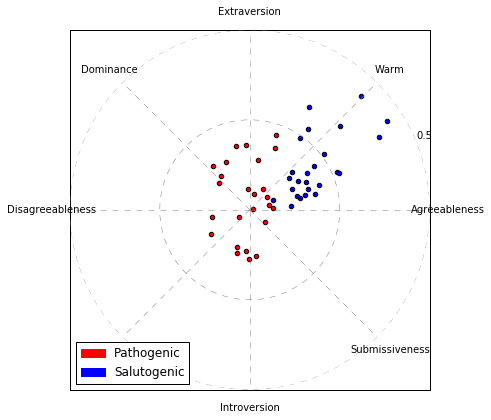

In [394]:
x_item, y_item, labels = ("agr", "ext", ['Agreeableness', 'Warm', 'Extraversion', 'Dominance', 'Disagreeableness', 'Cold-hearted', 'Introversion', 'Submissiveness'])
#x_item, y_item, labels = ("con", "neu", ['Conscientiousness', '', 'Neuroticism', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "agr", ['Openness', '', 'Agreeableness', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "ext", ['Openness', '', 'Extraversion', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "neu", ['Openness', '', 'Neuroticism', '', '', '', '', ''])
pers_plot = pers_corr[[x_item, y_item]]
plot_personality(x_item, y_item, pers_plot, labels, use_images=False, show_plot=True)

In [16]:
topics = ["157", "622", "327", "1456", "1452", "381", "113", "1733", "1517", "1910", "466", "850", "1642", "1347", "1262", "873", "495", "193", "323", "147", "1886", "1132", "807", "1917", "358", "1725", "472", "599", "1875", "1450", "413", "1933", "964", "616", "747", "713", "1159", "123", "99", "1984", "1775", "1129", "26", "303", "277", "982", "714", "690", "1916", "1566"]
topic_dict = dict()
db = "permaLexicon"
tbl = "met_a30_2000_freq_t50ll"
lim = 5
for topic in topics:
    topic_dict[topic] = ""
    sql = """SELECT term FROM {db}.{tbl} where category='{topic}' order by weight desc limit {lim}""".format(db=db, tbl=tbl,topic=str(topic), lim=str(lim))
    results = db_eng.execute(sql)
    topic_dict[topic] +=  ", ".join([str(row[0]) for row in results])

In [489]:
import mpld3
mpld3.enable_notebook()

In [490]:
def plot_labeled_personality(traitX, traitY, dataframe, labels, topics):
    #for x, y in zip(xData, yData)
    threshold = 0.05
    bound = 0.25
    
    #fig = plt.figure()
    ####ax = fig.add_subplot(111)
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'), figsize=(10,10))
    
    ####ax.yaxis.grid(True, which='major')
    
    #legend
    path_red = mpatches.Patch(color='red', label='Pathogenic')
    sal_blue = mpatches.Patch(color='blue', label='Salutogenic')
    x_bpoints = []
    y_bpoints = []
    x_rpoints = []
    y_rpoints = []
    labels_b = []
    labels_r = []
    for index, row in dataframe.iterrows():
        x = row[traitX]
        y = row[traitY]
        try:
            if int(index) in [157, 622, 327, 1456, 1452, 381, 113, 1733, 1517, 1910, 466, 850, 1642, 1347, 1262, 873, 495, 193, 323, 147, 1886, 1132, 807, 1917, 358]: # path topics
                x_rpoints.append(x)
                y_rpoints.append(y)
                labels_r.append(topics[index])
            else: # sal topics
                x_bpoints.append(x)
                y_bpoints.append(y)
                labels_b.append(topics[index])
           
        except:
            pass
#     ax_polar = fig.add_axes([0,0,bound,bound], polar=True, frameon=False)
#     ax_polar.set_xticklabels(labels)
#     ax_polar.set_rticks([0.5,1.0])
#     ax_polar.set_yticklabels(['', '0.5'])
#     ax_polar.grid(True, color="grey", linestyle="--")    
    #ax = fig.add_axes([0,0,bound,bound])
    bscatter = ax.scatter(x_bpoints, y_bpoints, c='blue')
    rscatter = ax.scatter(x_rpoints, y_rpoints, c='red')
    
    ax.set_xlim([-bound,bound])
    ax.set_ylim([-bound,bound])
    ax.set_axis_bgcolor('white')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.grid(False)#, color="black", linestyle="--")
    
    circle1 = plt.Circle((0, 0), radius=0.125, fill=False, linestyle='dashed')
    plt.gca().add_patch(circle1)
    circle2 = plt.Circle((0, 0), radius=0.25, fill=False, linestyle='dashed')
    plt.gca().add_patch(circle2)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='k',  linestyle='dashed')
    ax.plot([1, 0], [0, 1], transform=ax.transAxes, color='k',  linestyle='dashed')
    ax.plot([0,1], [0.5,0.5], transform=ax.transAxes, color='k',  linestyle='dashed')
    ax.plot([0.5,0.5], [0,1], transform=ax.transAxes, color='k',  linestyle='dashed')
    
    ax.plot([0,1], [1,1], transform=ax.transAxes, color='k',  linestyle='solid')
    ax.plot([1,1], [0,1], transform=ax.transAxes, color='k',  linestyle='solid')

    #plt.legend(handles=[path_red, sal_blue], loc = 'lower left')
    tooltip = mpld3.plugins.PointLabelTooltip(bscatter, labels=labels_b)
    mpld3.plugins.connect(fig, tooltip)
    tooltip = mpld3.plugins.PointLabelTooltip(rscatter, labels=labels_r)
    mpld3.plugins.connect(fig, tooltip)
    #mpld3.display()
    #return fig


#     if show_plot:
#         plt.show()
#     else:
#         if use_images:
#             plt.savefig("plot_%s_vs_%s.pdf" % (traitX, traitY), dpi=300, format='pdf', bbox_inches='tight')
#         else:
#             plt.savefig("plot_%s_vs_%s_dots.pdf" % (traitX, traitY), dpi=300, format='pdf', bbox_inches='tight')

In [491]:
x_item, y_item, labels = ("agr", "ext", ['Agreeableness', 'Warm', 'Extraversion', 'Dominance', 'Disagreeableness', 'Cold-hearted', 'Introversion', 'Submissiveness'])
#x_item, y_item, labels = ("con", "neu", ['Conscientiousness', '', 'Neuroticism', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "agr", ['Openness', '', 'Agreeableness', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "ext", ['Openness', '', 'Extraversion', '', '', '', '', ''])
#x_item, y_item, labels = ("ope", "neu", ['Openness', '', 'Neuroticism', '', '', '', '', ''])
pers_plot = pers_corr[[x_item, y_item]]
plot_labeled_personality(x_item, y_item, pers_plot, labels, topics=topic_dict)
mpld3.display()

In [71]:
def my_func():
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    N = 100

    scatter = ax.scatter(np.random.normal(size=N),
                         np.random.normal(size=N),
                         c=np.random.random(size=N),
                         s=1000 * np.random.random(size=N),
                         alpha=0.3,
                         cmap=plt.cm.jet)
    ax.grid(color='white', linestyle='solid')

    ax.set_title("Scatter Plot (with tooltips!)", size=20)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

    #mpld3.display()

In [72]:
my_func()
mpld3.display()

In [408]:
# import matplotlib.pyplot as plt
# import numpy as np
# from numpy.random import random

# import plotly.plotly as py
# import plotly.tools as tls
# py.sign_in('sgiorgi', '95bevqxgt7')

# colors = ['b', 'c', 'y', 'm', 'r']

# lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
# ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
# l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])
# a  = plt.scatter(random(10), random(10), marker='o', color=colors[2])
# h  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
# hh = plt.scatter(random(10), random(10), marker='o', color=colors[4])
# ho = plt.scatter(random(10), random(10), marker='x', color=colors[4])

# text = iter(['Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'])


# mpl_fig = plt.gcf()
# plotly_fig = tls.mpl_to_plotly( mpl_fig )

# i = 0
# for dat in plotly_fig['data']:
#     i += 1
#     print(i)
#     t = text.next()
#     dat.update({'name': t, 'text':t})

# plotly_fig['layout']['showlegend'] = True
# py.plot(plotly_fig)